In [1]:
%pylab inline
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
import numpy as np
import tqdm as tqdm
import tempfile

np.set_printoptions(suppress=True)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# load the mnist dataset

def fetch(url):
    import requests, gzip, os, hashlib, numpy
    fp = os.path.join(tempfile.gettempdir(), hashlib.md5(url.encode('utf-8')).hexdigest())
    if os.path.exists(fp):
        with open(fp, "rb") as f:
            dat = f.read()
    else:
        with open(fp, "wb") as f:
            dat = requests.get(url).content
            f.write(dat)
    return numpy.frombuffer(gzip.decompress(dat), dtype=np.uint8).copy()

X_train = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28*28)) /  255.0
Y_train = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28*28)) / 255.0
Y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]

In [3]:
# Define Sequential model with 2 layers
def uniform_init(shape, dtype=None):
    return np.random.uniform(-1.0, 1.0, shape) / np.sqrt(shape[0] * shape[1]).astype(np.float32)

def bias_init(shape, dtype=None):
    return np.random.random(shape[0]) * 0.01

model = keras.Sequential(
    [
        keras.Input(shape=(784,)),
        layers.Dense(128, activation="relu", use_bias=True, kernel_initializer=uniform_init, bias_initializer=bias_init),
        layers.Dense(10, activation="softmax", use_bias=True, kernel_initializer=uniform_init, bias_initializer=bias_init),
    ]
)

In [4]:
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.01),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [10]:
def train_model(max_epochs, batch_size):
    losses, accuracies = [], []
    t = tqdm.trange(max_epochs)
    for i in t:
        with tf.GradientTape() as tape:
            sample = np.random.randint(0, X_train.shape[0], size=(batch_size))
            batch_train_X = tf.constant(value=X_train[sample], dtype=tf.dtypes.float32)
            batch_train_Y = tf.constant(value=Y_train[sample], dtype=tf.dtypes.int32)

            predictions_Y = model(batch_train_X)
            predictions_labels = tf.argmax(predictions_Y, axis=1, output_type=tf.dtypes.int32)
            predictions_labels = tf.equal(tf.round(predictions_labels), tf.round(batch_train_Y))

            accuracy = tf.reduce_mean(tf.cast(predictions_labels, tf.float32))
            loss = model.loss(y_pred=predictions_Y, y_true=batch_train_Y)

        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss.
        grads = tape.gradient(loss, model.trainable_weights)

        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
        model.optimizer.apply_gradients(zip(grads, model.trainable_weights))

        losses.append(loss)
        accuracies.append(accuracy)
        t.set_description("loss %.2f accuracy %.2f" % (loss, accuracy))

    ylim(0.0, 3.0)
    l1 = plot(losses, label='Loss')
    plot(accuracies, label='Accuracy')
    legend()

loss 0.94 accuracy 0.77: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 80.32it/s]


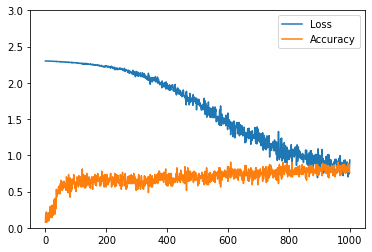

In [11]:
max_epochs = 1000
batch_size = 64
train_model(max_epochs, batch_size)

In [ ]:
imshow(X_test[0].reshape(28, 28))
model.predict(X_test[0].reshape(1, -1)).argmax()

In [ ]:
def test_model(max_epochs, batch_size):
    losses, accuracies = [], []
    t = tqdm.trange(max_epochs)
    for i in t:
        sample = np.random.randint(0, X_test.shape[0], size=(batch_size))
        batch_test_X = tf.constant(value=X_test[sample], dtype=tf.dtypes.float32)
        batch_test_Y = tf.constant(value=Y_test[sample], dtype=tf.dtypes.int32)

        predictions_Y = model(batch_test_X)
        predictions_labels = tf.argmax(predictions_Y, axis=1, output_type=tf.dtypes.int32)
        predictions_labels = tf.equal(tf.round(predictions_labels), tf.round(batch_test_Y))

        accuracy = tf.reduce_mean(tf.cast(predictions_labels, tf.float32))
        loss = model.loss(y_pred=predictions_Y, y_true=batch_test_Y)

        losses.append(loss)
        accuracies.append(accuracy)
        t.set_description("loss %.2f accuracy %.2f" % (loss, accuracy))

    ylim(0.0, 3.0)
    l1 = plot(losses, label='Loss')
    plot(accuracies, label='Accuracy')
    legend()

In [ ]:
test_model(max_epochs, batch_size)

7

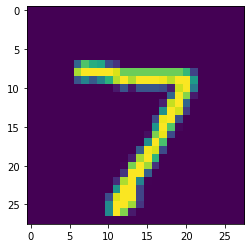

In [9]:
test_model(max_epochs, batch_size)

In [7]:
def test_model(max_epochs, batch_size):
    losses, accuracies = [], []
    t = tqdm.trange(max_epochs)
    for i in t:
        sample = np.random.randint(0, X_test.shape[0], size=(batch_size))
        batch_test_X = tf.constant(value=X_test[sample], dtype=tf.dtypes.float32)
        batch_test_Y = tf.constant(value=Y_test[sample], dtype=tf.dtypes.int32)

        predictions_Y = model(batch_test_X)
        predictions_labels = tf.argmax(predictions_Y, axis=1, output_type=tf.dtypes.int32)
        predictions_labels = tf.equal(tf.round(predictions_labels), tf.round(batch_test_Y))

        accuracy = tf.reduce_mean(tf.cast(predictions_labels, tf.float32))
        loss = model.loss(y_pred=predictions_Y, y_true=batch_test_Y)

        losses.append(loss)
        accuracies.append(accuracy)
        t.set_description("loss %.2f accuracy %.2f" % (loss, accuracy))

    ylim(0.0, 3.0)
    l1 = plot(losses, label='Loss')
    plot(accuracies, label='Accuracy')
    legend()

loss 2.30 accuracy 0.09: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 139.78it/s]


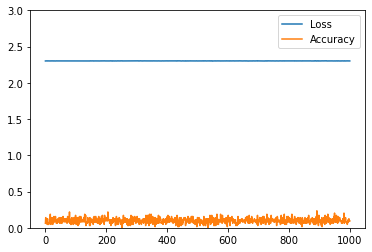

In [8]:
test_model(max_epochs, batch_size)